# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Description
* CustomerID: Unique identifier for each customer. 
* Genre: Categorical data representing the gender of the customer. Values could be "Male" or "Female." 
* Age: Numeric data indicating the age of the customer. 
* Income: Represents the annual income of the customer.
* SpendScore: A numeric score representing the spending behavior or customer loyalty. 

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   SpendScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Income,SpendScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore','Genre':'Gender'},inplace=True)

In [12]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


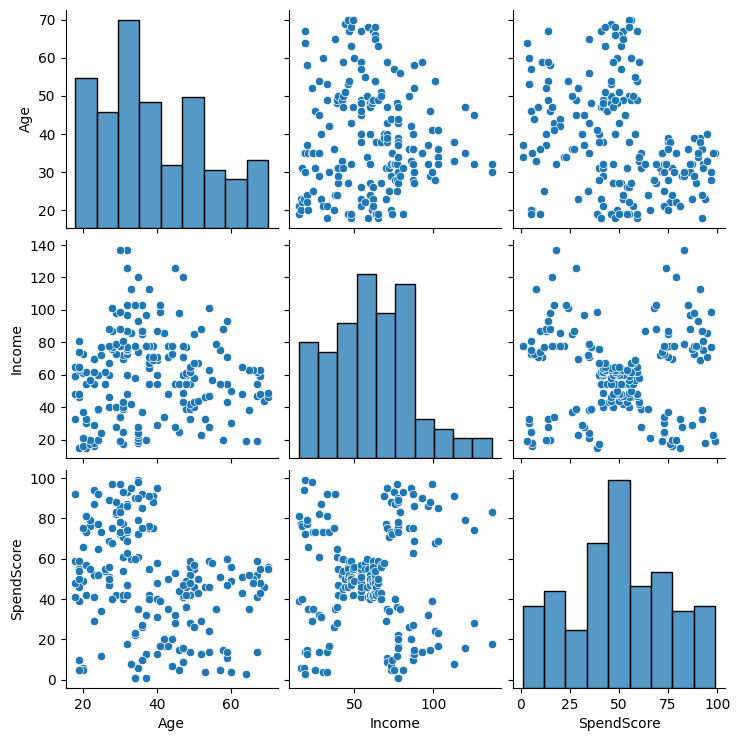

In [45]:
sns.pairplot(df);

* From the above diagram, we can say that the customer id is not correlated with income, it's not an useful feature so we can remove that.

In [19]:
df=df.drop(['CustomerID'],axis=1)

In [20]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [43]:
df1=df.select_dtypes('int64')

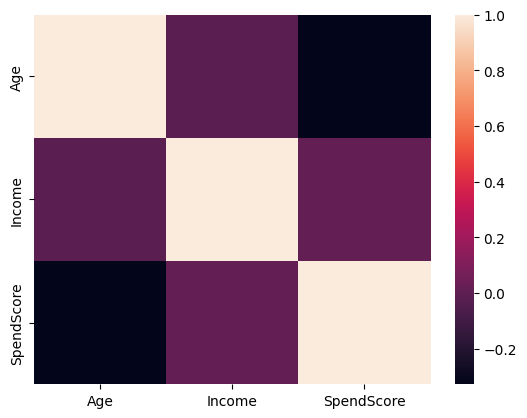

In [46]:
sns.heatmap(df1.corr());

In [ ]:
df['Age'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age'])
# plt.xticks(rotation=90)

**Peoples of age between 25 to 40 are mostly visiting mall than other age groups**

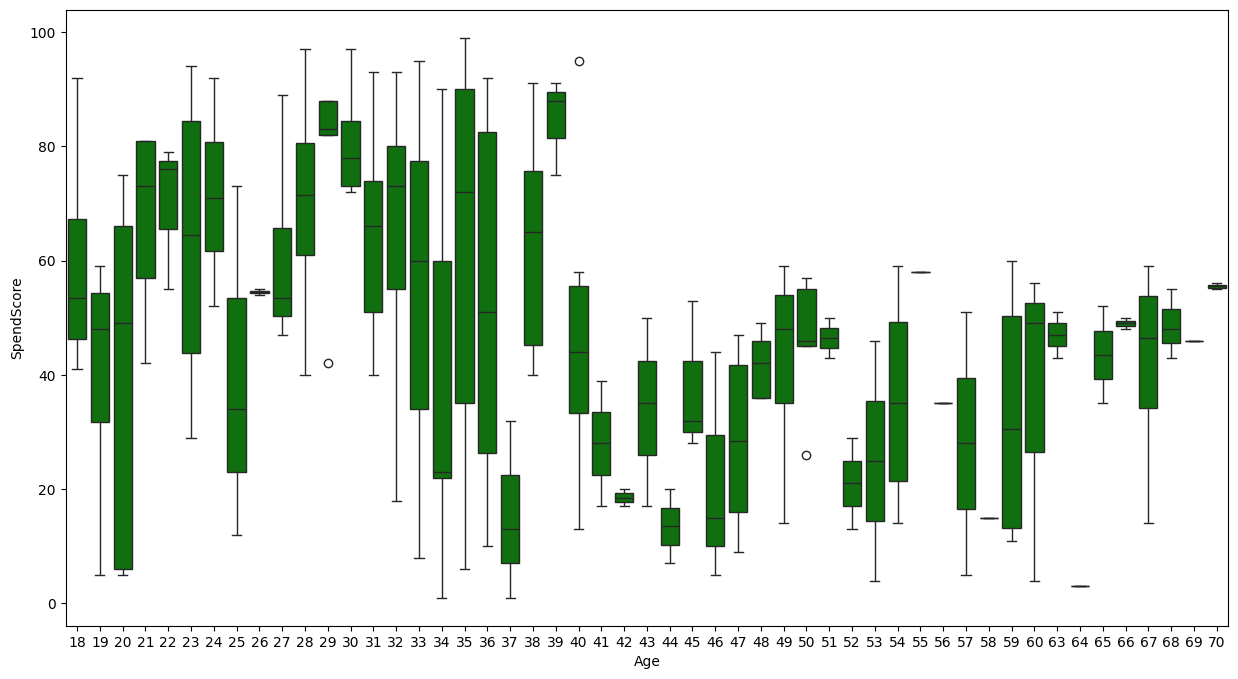

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Age'],y=df['SpendScore'],color='g');


* This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore

<Axes: xlabel='Income', ylabel='count'>

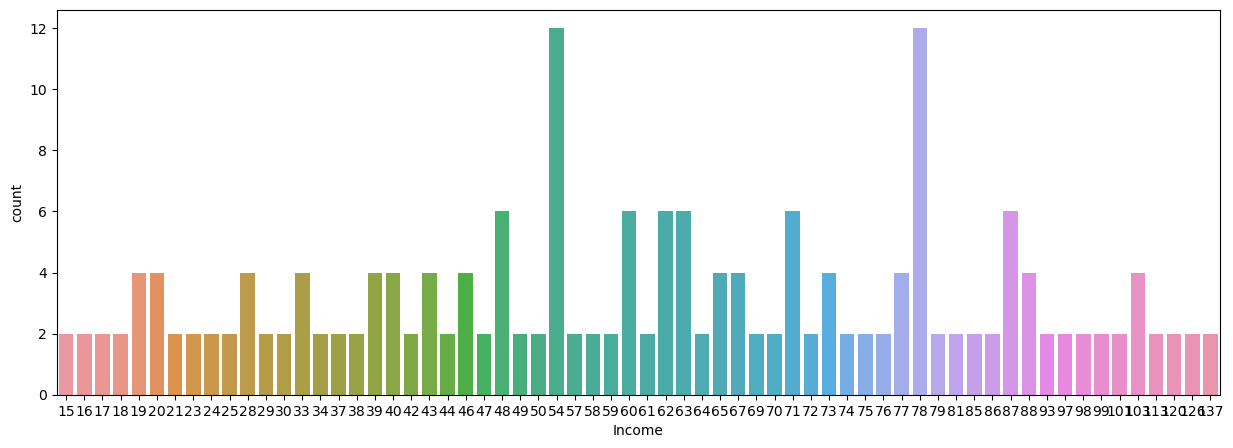

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Income'])


* Peoples of salary 54k and 78k are the mostly visited persons in mall.

Text(0, 0.5, 'Spendscore')

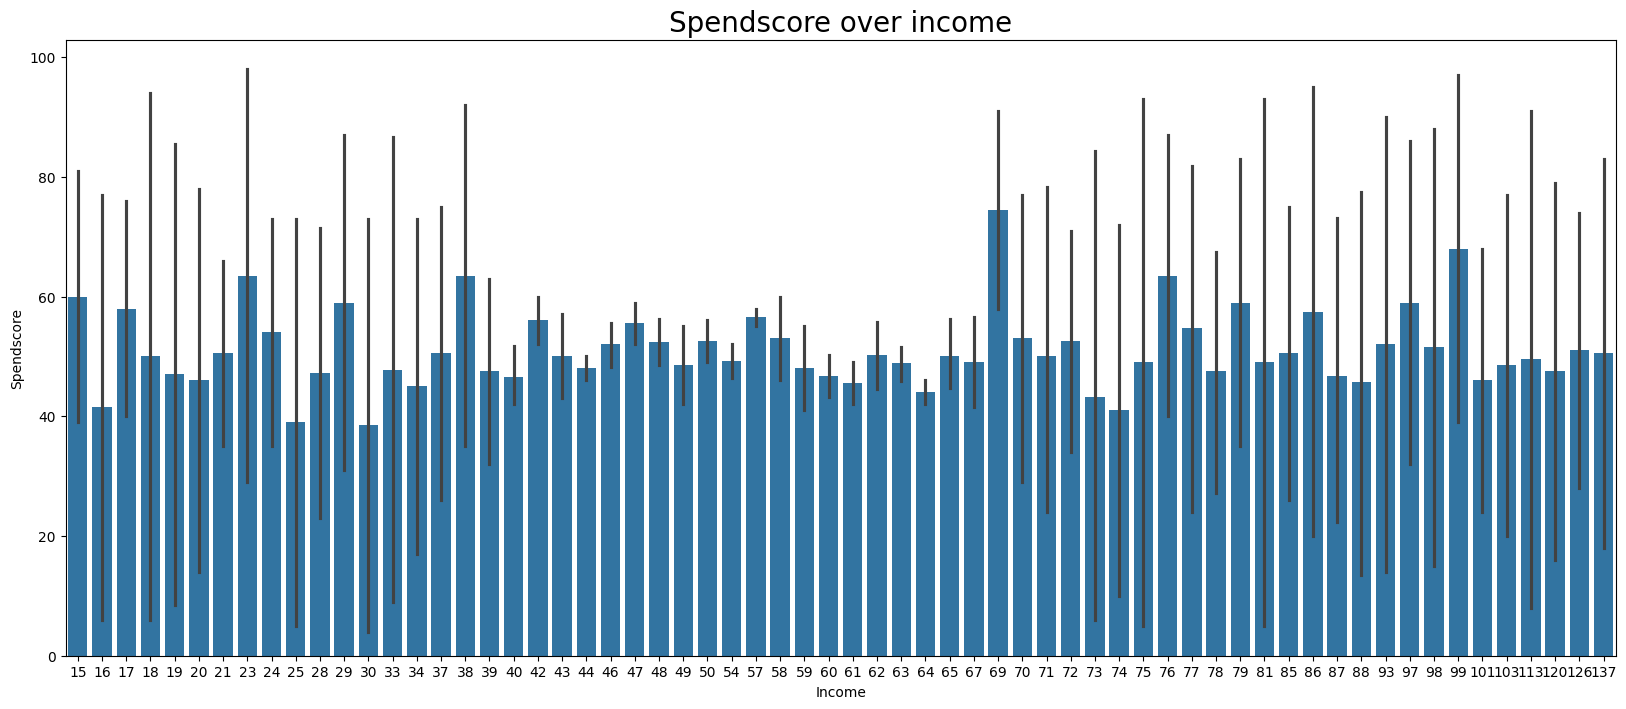

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['Income'],y=df['SpendScore'],data=df)
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

* Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score.

# **Density Based Spacial Clustering of Applications with noise (DBSCAN)**

* We are going to use the DBSCAN  for algorithm for the purpose of clustering.
* It is an unsupervised machine learning algorithm.
* It is used for clusters of high density.
* It automatically predicts the outliers and removes it.
* It is better than hierarchical and k-means clustering algorithm.
* It makes the clusters based on the parameters like epsilon,min points and noise.
* It separately predicts the core points, border points and outliers efficiently.**

In [26]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [27]:
x=df.iloc[:,[2,3]].values

In [28]:
x.shape

(200, 2)

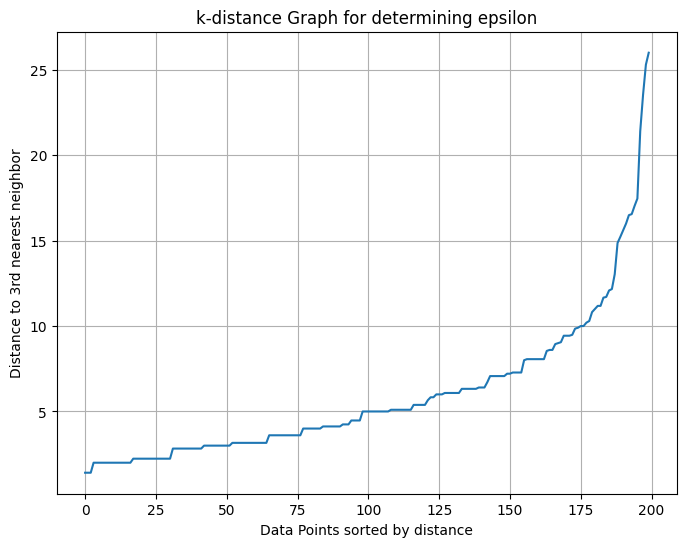

In [29]:
# Compute the nearest neighbors
from sklearn.neighbors import NearestNeighbors
min_samples=4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

# Sort the distances (3rd column, since min_samples=4) in ascending order
distances = np.sort(distances[:, min_samples-1])

# Plot the distances
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.ylabel('Distance to {}rd nearest neighbor'.format(min_samples-1))
plt.xlabel('Data Points sorted by distance')
plt.title('k-distance Graph for determining epsilon')
plt.grid(True)
plt.show()

In [30]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [31]:
model=db.fit(x)

In [32]:
label=model.labels_

In [33]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [34]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


* np.zeros_like(label, dtype=bool) creates a new array, sample_cores, of the same shape as the label array, filled with False values.
* label Array: This array contains the cluster labels assigned to each data point by the DBSCAN algorithm. 
    * For example, if you have 100 data points, label might look like [0, 0, 1, 1, -1, 2, ...], where each number represents the cluster to which a data point belongs. 
    * -1 typically indicates that a point is considered noise and does not belong to any cluster.
* Purpose: sample_cores is a boolean array that will be used to identify which points are core points. Initially, it assumes all points are not core points (hence, all False).

* db.core_sample_indices_: This attribute of the DBSCAN object (db) contains the indices of the core points identified by DBSCAN.
* Core Points: In DBSCAN, a core point is a point that has at least min_samples points (including itself) within its eps neighborhood. These core points are central to forming clusters.
* Assignment: By setting sample_cores[db.core_sample_indices_] = True, you update the sample_cores array so that positions corresponding to core points are set to True. All other positions remain False.
* Result: After this operation, sample_cores is a boolean array where True represents core points and False represents non-core points.

* set(label): Converts the label array into a set, which automatically removes duplicates and gives you the unique cluster labels. For example, if label = [0, 0, 1, 1, -1, 2, 2], then set(label) would be {0, 1, 2, -1}.
* Unique Labels: Each unique number in label corresponds to a distinct cluster. For example, 0, 1, and 2 would represent three different clusters, and -1 represents noise.
* (1 if -1 in label else 0): Subtracts 1 from the cluster count if -1 is present in label. In DBSCAN, the label -1 is assigned to noise points, so this step ensures that noise is not counted as a cluster.
* n_clusters: The resulting value is the number of clusters identified by DBSCAN (excluding noise).

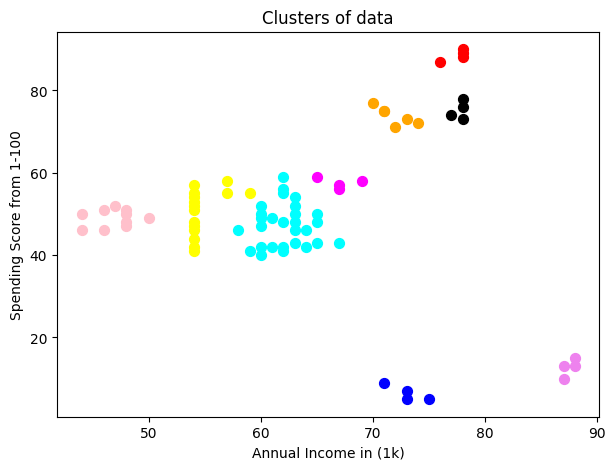

In [35]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()



In [36]:
x[y_means == 0, 0]

array([44, 44, 46, 46, 47, 48, 48, 48, 48, 50], dtype=int64)

In [37]:
[y_means == 0, 1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True, False, False,  True,
        False,  True, False,  True,  True, False,  True, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [38]:
x[y_means == 1, 0]

array([54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 57, 57, 59],
      dtype=int64)

In [39]:
x[y_means == 1, 1]

array([47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57, 46, 58, 55, 55],
      dtype=int64)

# HIERARCHICAL CLUSTERING

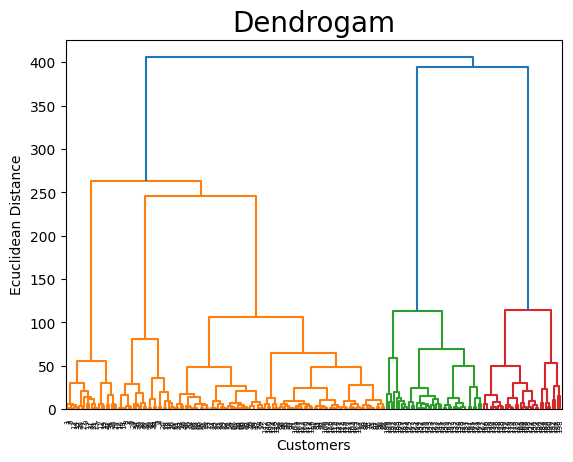

In [40]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12972\3935758960.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


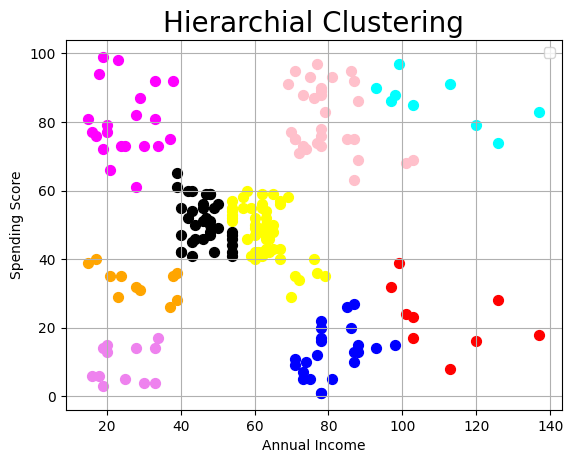

In [42]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 9, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()